In [ ]:
#@title Identificação do Grupo

#@markdown Integrantes do Grupo (*informe \<TIA\>,\<nome\>*)
Aluno1 = '00000845936, Athos Pugliese' #@param {type:"string"}
Aluno2 = '00000845946, Saulo Raphael' #@param {type:"string"}

# **Apresentação**

# Problema

Este trabalho investiga o impacto de variáveis socioeconômicas no preço de apartamentos
adquiridos por compradores de primeira viagem. A motivação para escolher esse problema
reside na sua relevância social e econômica, oferecendo insights valiosos para indivíduos e
famílias que planejam sua primeira compra imobiliária. A análise busca identificar padrões
que possam auxiliar compradores a tomar decisões mais informadas sobre o timing e a
localização de suas compras, maximizando o valor de seus investimentos.



# Referencial Teórico

O referencial teórico deste estudo é fundamentado em literatura sobre economia imobiliária,
análise preditiva e ciência de dados. Explora-se a relação entre características pessoais e
econômicas (como idade, salário, e score de crédito) e o preço do imóvel. Referências
incluem trabalhos sobre a elasticidade de preços no mercado imobiliário, impacto das taxas
de juros e outros fatores macroeconômicos sobre os preços de imóveis. Estudos anteriores
que modelaram previsões de preços imobiliários usando técnicas estatísticas e de
aprendizado de máquina também são citados para fundamentar a metodologia

# Metodologia

O projeto emprega uma metodologia quantitativa, utilizando dados reais de compradores de
imóveis. As principais variáveis analisadas incluem idade, salário, taxa de juros, entrada,
tempo de empréstimo, gasto mensal, e score creditício. As técnicas de machine learning
aplicadas são a Regressão Linear e a Decision Tree Regressor. A escolha destas técnicas é
justificada pela sua capacidade de modelar tanto relações lineares quanto não-lineares
entre variáveis.


# Resultados



# **Implementação**

# Base de Dados

*Descreva aqui os dados utilizados, discuta eventuais transformações e/ou seleções dos dados e preparações nos dados.*




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
url = "https://raw.githubusercontent.com/athospugliese/machinelearning_unicap/main/CompraDoPrimeiroAp.csv"
df = pd.read_csv(url)

In [ ]:
df.describe()

,idade,salario,taxaDeJuros,entrada,precoDoApartamento,tempoDeEmprestimo,gastoMensal,score
count,1051.000000,1051.000000,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1051.000000
mean,29.556613,6900.142721,5.126622,26623.882017,1.558949e+06,27.192198,3185.870599,711.337774
std,3.368111,763.932482,0.805953,3036.740979,1.335579e+06,2.806994,374.701695,24.981881
min,23.000000,4000.000000,3.800000,15000.000000,1.500000e+05,15.000000,1500.000000,610.000000
25%,28.000000,6800.000000,4.600000,25000.000000,8.200000e+05,26.000000,3000.000000,700.000000
50%,29.000000,7000.000000,4.800000,26000.000000,9.700000e+05,28.000000,3200.000000,720.000000
75%,31.000000,7300.000000,5.500000,28000.000000,1.800000e+06,29.000000,3400.000000,725.000000
max,55.000000,8500.000000,7.200000,40000.000000,5.600000e+06,33.000000,4200.000000,750.000000


## **Modelo 1**

O 1° Modelo Escolhido se trata de um DecisionTreeRegressor com o Objetivo de analisar o perfil do comprador e suas características e definir o possível preço do Apartamento apartir das informações passadas ao Modelo.


### **Modelo 1:** Preparação dos Dados

Apresente o passo a passo da analise exploratoria de dados e as técnicas utilizadas para a utilização dos modelos de aprendizado de máquina


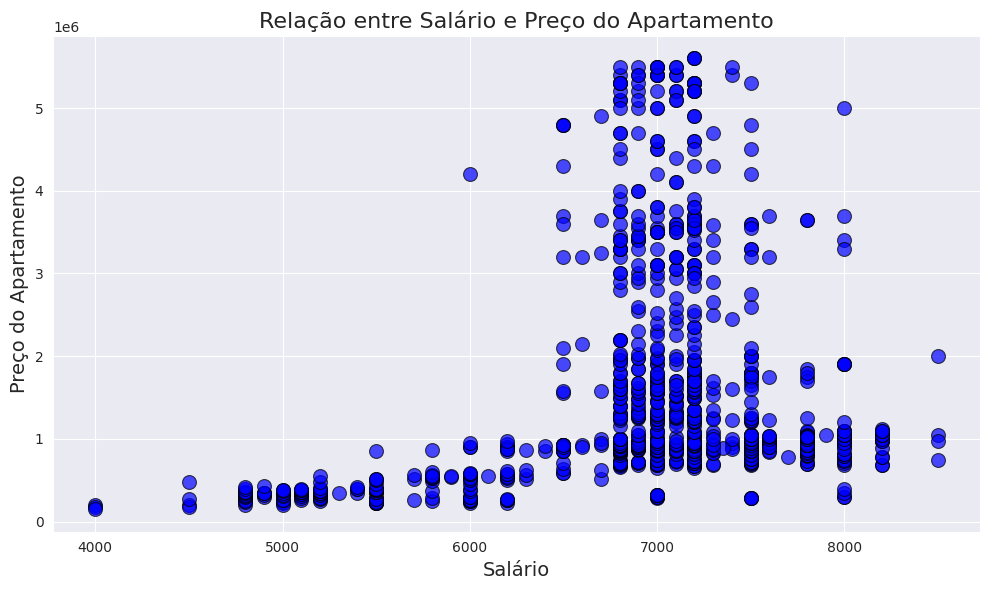

In [ ]:
sns.set_style("dark")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='salario', y='precoDoApartamento', color='blue', edgecolor='black', alpha=0.7, s=100)
plt.title('Relação entre Salário e Preço do Apartamento', fontsize=16)
plt.xlabel('Salário', fontsize=14)
plt.ylabel('Preço do Apartamento', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

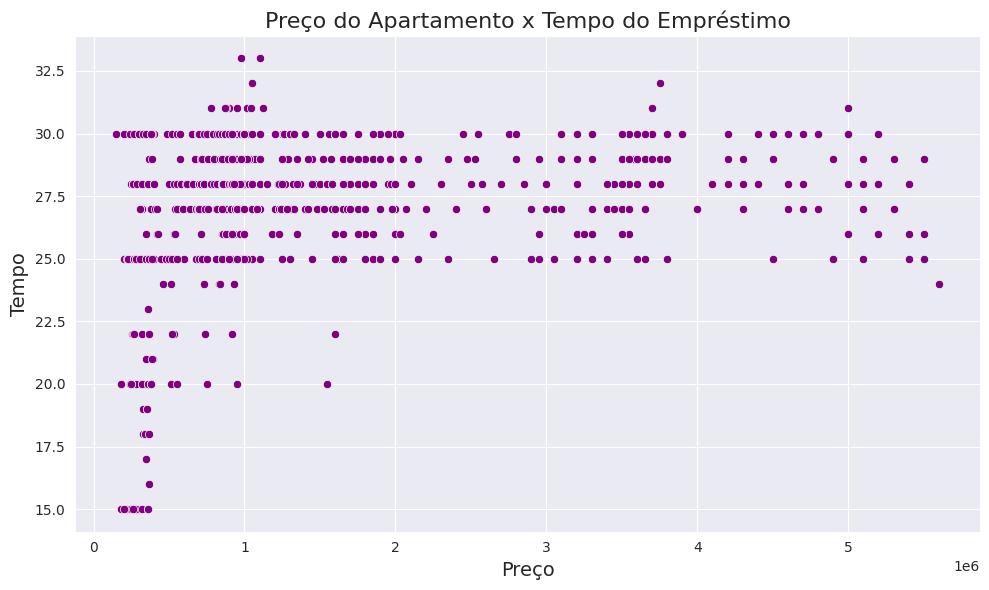

In [ ]:
sns.set_style("dark")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='precoDoApartamento', y='tempoDeEmprestimo', data=df, color='purple')
plt.title('Preço do Apartamento x Tempo do Empréstimo', fontsize=16)
plt.xlabel('Preço', fontsize=14)
plt.ylabel('Tempo', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_trabalho = label_encoder.fit_transform(df.statusTrabalhista)
df['Trabalho'] = label_trabalho
df['Trabalho'].sample(5)

1044    194
1019    160
376     167
401      71
974     231
Name: Trabalho, dtype: int64

### **Modelo 1:** Modelo de aprendizado de máquina DecisionTreeRegressor

Dado o conjunto de dados heterogêneo, a necessidade de capturar relações não lineares, a interpretabilidade e a robustez a outliers e dados faltantes, o DecisionTreeRegressor é uma escolha recomendada para modelar a relação entre as características fornecidas e o preço do apartamento. Ele já demonstrou um bom desempenho inicial e possui grande potencial para melhorias adicionais através de técnicas de refinamento.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X = df[['idade', 'salario', 'taxaDeJuros', 'entrada', 'tempoDeEmprestimo', 'gastoMensal', 'score','Trabalho']].values
y = df['precoDoApartamento'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
modelDTR1 = DecisionTreeRegressor()
modelDTR1.fit(X_train, y_train)

DecisionTreeRegressor()

### **Modelo 1:** Resultados
O que vocês encontraram, quais as metricas e demais ações


In [ ]:
predict1 = np.array([25,2500,4.7,15000,26,1000,550,104]).reshape(1, -1)
predict2 = np.array([44,10500,7.7,55000,20,4000,850,134]).reshape(1, -1)

In [ ]:
print(modelDTR1.predict(predict1))

[180000.]


In [ ]:
print(modelDTR1.predict(predict2))

[3300000.]


In [ ]:
print(modelDTR1.predict(X_test))

[1000000. 1300000.  950000.  940000.  320000.  850000.  640000.  850000.
  390000. 1000000.  900000. 1280000.  520000.  920000.  920000. 5400000.
  960000.  860000. 3000000.  930000.  790000. 2850000. 5200000. 2100000.
 1000000.  370000. 1350000.  270000.  950000.  950000.  480000.  760000.
  900000. 2200000.  540000. 1750000.  950000.  920000. 3800000.  670000.
 1650000. 1620000.  960000. 1530000.  280000. 1030000.  280000.  980000.
 5600000. 5000000. 4900000. 1250000. 1680000. 3000000.  640000. 1260000.
  510000.  710000. 1000000. 3800000. 2700000.  920000. 1200000. 1200000.
  180000. 2700000.  880000. 2850000. 3700000.  700000. 1530000. 2030000.
  870000. 2030000. 1000000.  920000. 3550000.  700000. 5300000.  920000.
  380000. 3100000.  900000.  870000.  900000. 1750000. 4000000. 3250000.
  720000.  390000.  340000. 1400000.  360000.  900000.  920000. 3550000.
 1400000. 1255000. 1650000.  860000.  180000.  530000. 1200000.  880000.
  310000.  230000. 4900000.  345000.  520000. 12500

# Métricas e Gráfico de Predição

Aqui estão as Métricas do 1° Modelo, que apresentou valores bastante notáveis e se mostrou muito útil para a aplicação

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_tr = modelDTR1.predict(X_test)

mae_tr = mean_absolute_error(y_test, y_pred_tr)
mse_tr = mean_squared_error(y_test, y_pred_tr)
rmse_tr = mean_squared_error(y_test, y_pred_tr, squared=False)
r2_tr = r2_score(y_test, y_pred_tr)

print("\nMétricas para DecisionTreeRegressor:")
print(f"MAE: {mae_tr}")
print(f"MSE: {mse_tr}")
print(f"RMSE: {rmse_tr}")
print(f"R²: {r2_tr}")


Métricas para DecisionTreeRegressor:
MAE: 173955.69620253163
MSE: 82936550632.91139
RMSE: 287987.0667806306
R²: 0.952547709988407


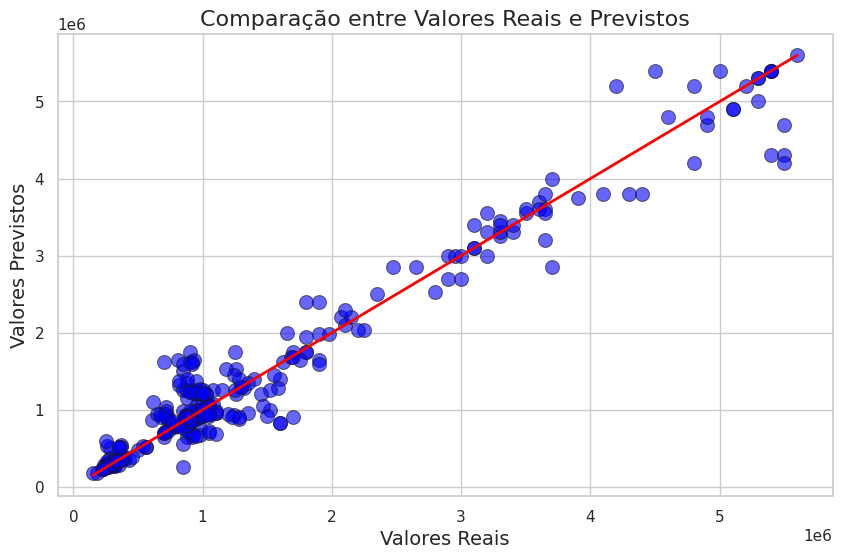

In [ ]:
y_pred = modelDTR1.predict(X_test)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, s=100, color='blue', edgecolor='k', alpha=0.6)
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Valores Reais', fontsize=14)
plt.ylabel('Valores Previstos', fontsize=14)
plt.title('Comparação entre Valores Reais e Previstos', fontsize=16)
plt.grid(True)
plt.show()

## **Modelo 2**

O 2° Modelo aplicado foi um de Regressão Linear, baseado no preço do apartamento e tentando descobrir a possível taxa de Juros.


### **Modelo 2:** Preparação dos Dados


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X1 = df['precoDoApartamento'].values.reshape(-1,1)
y1 = df['taxaDeJuros'].values

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

X1_train = X1_train.reshape(-1, 1)
X1_test = X1_test.reshape(-1, 1)

### **Modelo 2:** Modelo


In [ ]:
modelo1 = LinearRegression()
modelo1.fit(X1_train,y1_train)

y1_pred = modelo1.predict(X1_test)

### **Modelo 2:** Resultados


In [ ]:
pred1 = np.array([150000.0,120000.0,190000.0,550000.0,250000.0,300000.0,315000.0,600000.0,750000.0]).reshape(-1,1)
modelo1.predict(pred1)

array([4.34181092, 4.32498868, 4.36424058, 4.56610748, 4.39788506,
       4.42592213, 4.43433325, 4.59414455, 4.67825576])

In [ ]:
pred2 = np.array([200000.0, 180000.0, 220000.0, 500000.0, 280000.0]).reshape(-1, 1)
modelo1.predict(pred2)

array([4.36984799, 4.35863316, 4.38106282, 4.53807041, 4.4147073 ])

# Métricas e Gráfico de Predição

Aqui estão as Métricas do 2° Modelo

In [ ]:
mae = mean_absolute_error(y1_test, y1_pred)
mse = mean_squared_error(y1_test, y1_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y1_test, y1_pred)

print("Métricas do modelo de regressão linear:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Métricas do modelo de regressão linear:
MAE: 0.22678204246788908
MSE: 0.08753920835638603
RMSE: 0.2958702559507901
R²: 0.8539131991478056


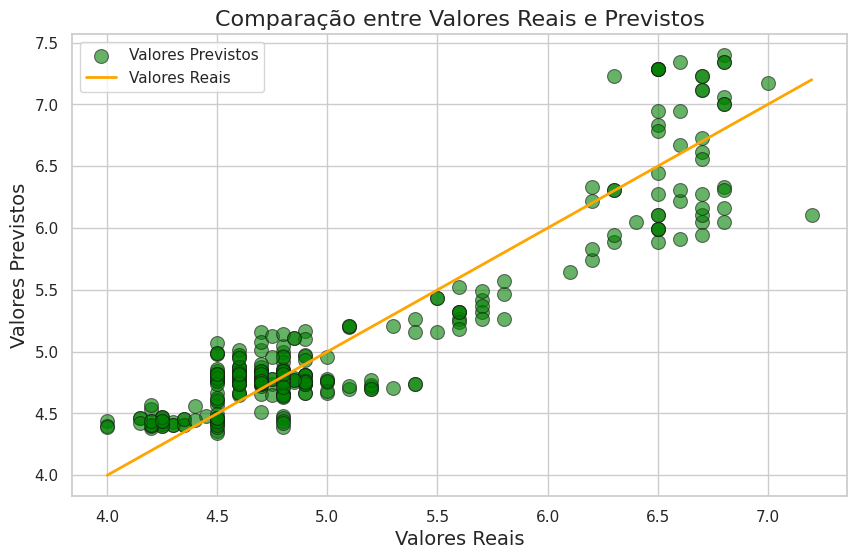

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y1_test, y=y1_pred, s=100, color='green', edgecolor='k', alpha=0.6, label ='Valores Previstos')
sns.lineplot(x=[y1_test.min(), y1_test.max()], y=[y1_test.min(), y1_test.max()], color='orange', lw=2, label='Valores Reais')
plt.xlabel('Valores Reais', fontsize=14)
plt.ylabel('Valores Previstos', fontsize=14)
plt.title('Comparação entre Valores Reais e Previstos', fontsize=16)
plt.grid(True)
plt.show()

# **Conclusão**

*Apresente a conclusão do seu estudo comparando ainda os resultados obtidos com o referencial teórico apresentado.*



# **Referências**

*Indique as referências empregadas, incluindo as fontes de dados.*

---

In [ ]:
#@title Avaliação
Completo = 0 #@param {type:"slider", min:0, max:10, step:1}
#@markdown Projeto cumpre todos os itens pedidos.
Relevancia = 0 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As seleções de dados e eventos para análise são relevantes e justificados.
Tecnicas = 4 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As técnicas de empregadas são adequadas e corretamente aplicadas.
Apresentacao = 4 #@param {type:"slider", min:0, max:10, step:1}
#@markdown A apresentação dos resultados é clara e objetiva.
Analise = 4 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As premissas de análise se justificam e a analise é correta.
Conclusao = 4 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As conclusões são justificadas e relevantes
Bonus = 0.5 #@param {type:"slider", min:0, max:1, step:0.5}
#@markdown A critério do professor por inovações na abordagem e no uso de técnicas de Análise de Dados








In [ ]:
#@markdown ### Nota Final
nota = Completo + Relevancia + Tecnicas + Apresentacao + Analise + Conclusao

nota = nota / 6 + Bonus

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
alunos

Nota final do trabalho 8.3



,tia,nome,nota
0,1115665,ADRIANA FUJITA,8.3
1,1115677,DANIEL HENRIQUE,8.3
